<a href="https://colab.research.google.com/github/beomseokwee/pythonBigData/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 션형 회귀

KNN을 활용하기 꺼려지는 상황

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
path = '/content/sample_data/Fish.csv'
df = pd.read_csv(path)
df
perch_df = df[df['Species']=='Perch']
perch_df

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
79,Perch,80.0,17.2,19.0,20.2,5.6358,3.0502
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720


In [4]:
perch_length = perch_df['Length2'].to_numpy()
perch_weight = perch_df['Weight'].to_numpy()

In [5]:
print(perch_length)
print(perch_weight)

[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


길이를 알고 있을 때 무게를 예축해 보자.

In [6]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight)

In [7]:
train_input.shape
# 독립변수는 2차원 배열로 되있어야 한다

(42,)

In [8]:
train_input = train_input.reshape(-1,1) # 독립변수 목록을 2차원 배열 구조로 변경
test_input = test_input.reshape(-1,1)
train_input.shape

(42, 1)

In [9]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(train_input,train_target)
pval = kn.predict([[50]])
print("예측 값",pval)

예측 값 [954.]


In [10]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=3)
kn.fit(train_input,train_target)
pval = kn.predict([[50]])
print("예측 값",pval)

예측 값 [1033.33333333]


In [11]:
# 학습 후 알아낸 변수를 파라미터라고 하고
# 학습한 인자를 사용자들한테 보낸 정보를 하이퍼 파라미터라고 한다.

In [12]:
print(kn.kneighbors([[50]])) # 파라미터들, 우리는 현재 3개로 바꿨기 때문에 3개가 나온다

(array([[6.5, 7. , 8. ]]), array([[17, 26,  9]]))


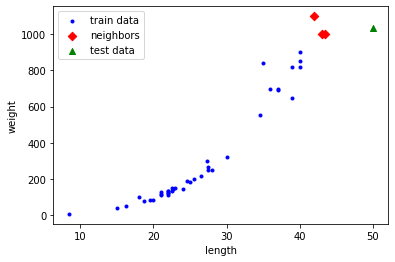

In [13]:
distances, indexes = kn.kneighbors([[50]])
plt.scatter(train_input, train_target,label = 'train data',color='b',marker='.')
plt.scatter(train_input[indexes],train_target[indexes], label = 'neighbors' , marker = 'D',color='r' )
plt.scatter(50,1033,label = 'test data', marker='^',color='g')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

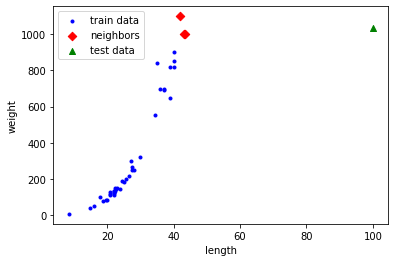

In [14]:
distances, indexes = kn.kneighbors([[50]])
plt.scatter(train_input, train_target,label = 'train data',color='b',marker='.')
plt.scatter(train_input[indexes],train_target[indexes], label = 'neighbors' , marker = 'D',color='r' )
plt.scatter(100,1033,label = 'test data', marker='^',color='g')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [15]:
# 자료에 적합한 선을 찾아가기(선형회귀)

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #model
lr.fit(train_input,train_target)
p_val = lr.predict([[50],[100]])
print(p_val) #KNN 방법에서는 인접한 값이 비슷하다 보니 1000이 나왔었는데 선형회귀 방법으로 학습하니 [50],[100]값이 늘어 난걸 볼 수있다.

[1169.1722919  2971.19866579]


In [17]:
# 예측한 것에대한 파라미터
p_val2 = kn.predict([[50],[100]])
print(p_val2)

[1033.33333333 1033.33333333]


In [18]:
print("가중치(기울기)::",lr.coef_,"편향:",lr.intercept_) # 편향 = 오차 , intercept = 절편, 학습해서 알아낸 값들을 파라미터라고 한다.

가중치(기울기):: [36.04052748] 편향: -632.8540819837158


In [19]:
print(50*lr.coef_+lr.intercept_)
print(p_val[0]) # 수치가 같게 나온다

[1169.1722919]
1169.172291901143


In [20]:
pval = kn.predict([[100]])
print("예측 값",pval)

예측 값 [1033.33333333]


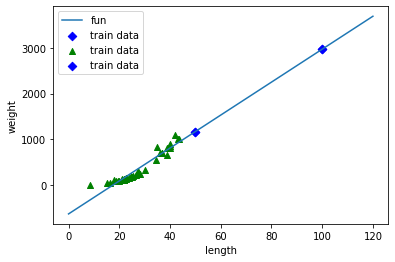

In [21]:
plt.scatter([50,100],p_val, label = 'train data' , marker = 'D',color='b' )
plt.scatter(train_input, train_target,label = 'train data',color='g',marker='^')
plt.scatter([50,100],p_val, label = 'train data' , marker = 'D',color='b' )
plt.plot([0,120],[0*lr.coef_+lr.intercept_, 120*lr.coef_+lr.intercept_],label = 'fun') # 선형 회귀 직선
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

가상의 데이터를 만들어서 선형 회귀를 해 보자

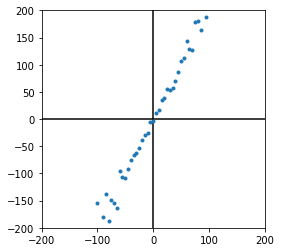

In [22]:

plt.figure(figsize=(4,4))
input = [x for x in range(-100,100,5)]
target = [ (2+ np.random.uniform(-0.5,0.5))*x+np.random.randint(-3,3) for x in input]
plt.plot(input,target,'.')
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.vlines(0,-200,200)
plt.hlines(0,-200,200)
plt.show()


In [23]:
input_data = np.array(input).reshape(-1,1)


In [24]:
input_data.shape

(40, 1)

In [25]:
target_data = np.array(target)

In [26]:
lr = LinearRegression()
lr.fit(input_data,target_data)
# print("편향=%0.2f"%lr.bcoef_,"기울기=%0.2f"%lr.intercept_)

LinearRegression()

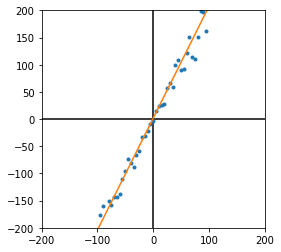

In [27]:

plt.figure(figsize=(4,4))
input = [x for x in range(-100,100,5)]
target = [ (2+ np.random.uniform(-0.5,0.5))*x+np.random.randint(-3,3) for x in input]
plt.plot(input,target,'.')
plt.plot([-200,200],[-200*lr.coef_+lr.intercept_,200*lr.coef_+lr.intercept_])
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.vlines(0,-200,200)
plt.hlines(0,-200,200)
plt.show()

y=2x_1x_1+3x_1+5

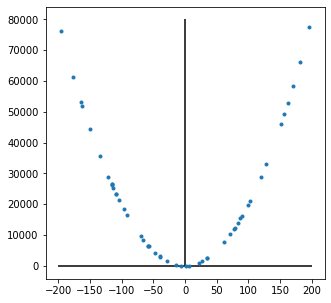

In [28]:
plt.figure(figsize=(5,5))
input = [np.random.randint(-200,200) for _ in range(50)] # 50개 점 랜덤 생성
target = [2*x*x+3*x+5 + np.random.randint(-10,10) for x in input]
plt.plot(input,target,'.')
#plt.xlim(-200,200)
#plt.ylim(-200,200)
plt.vlines(0,-200,80000)
plt.hlines(0,-200,200)
plt.show()


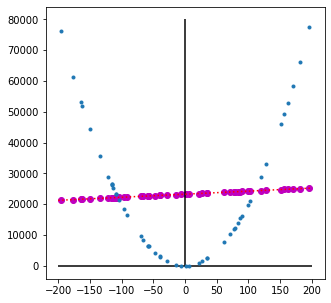

In [29]:
input_arr = np.array(input).reshape(-1,1)
lr = LinearRegression()
lr.fit(input_arr,target)
p_val = lr.predict(input_arr)
plt.figure(figsize=(5,5))
plt.plot(input,target,'.')
plt.plot([-200,200],[-200*lr.coef_+lr.intercept_,200*lr.coef_+lr.intercept_],'r:')
plt.scatter(input,p_val,color='m')
plt.vlines(0,-200,80000)
plt.hlines(0,-200,200)
plt.show()

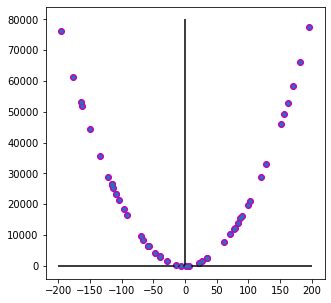

In [30]:
input_total = [[x,x*x] for x in input]
lr = LinearRegression()
lr.fit(input_total,target)
p_val2 = lr.predict(input_total)
plt.figure(figsize=(5,5))
plt.plot(input,target,'.')
plt.scatter(input,p_val2,color='m')
plt.vlines(0,-200,80000)
plt.hlines(0,-200,200)
plt.show()

In [31]:
print(train_input.shape)

(42, 1)


In [32]:
lr = LinearRegression()
lr.fit(train_input,train_target)
p_val = lr.predict([[2],[10],[50],[100]])
print(p_val)

[-560.77302703 -272.44880721 1169.1722919  2971.19866579]


In [33]:
perch_length = perch_df['Length2'].to_numpy()
perch_weight = perch_df['Weight'].to_numpy()
pl2 = [[x,x*x] for x in perch_length] # 길이와 길이 제곱을 리스트로 가지고 있는 멤버가 된다, 특성을 변형에서 넣어주는것(특성 공학 이라고 한다.)
lr = LinearRegression()
lr.fit(pl2,perch_weight)



LinearRegression()

In [34]:
test2 = [[x,x*x] for x in range(0,100)]
p_val2 = lr.predict(test2)

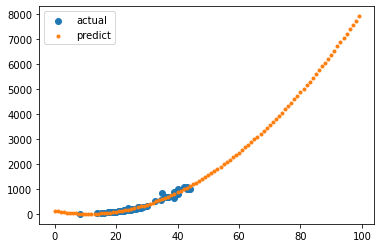

In [35]:
plt.scatter(perch_length,perch_weight,label='actual')
plt.scatter(range(0,100),p_val2,label="predict",marker='.')
plt.legend()
plt.show()

weight = -22.41length + 1.02*length + 131.6452

In [36]:
print(lr.coef_,lr.intercept_)

[-22.4189282    1.02094922] 131.6453196989612


In [37]:
weight = -22.41*perch_length + 1.02*perch_length + 131.64*perch_length
weight

array([ 926.1  , 1510.425, 1653.75 , 1786.05 , 1918.35 , 1984.5  ,
       2061.675, 2094.75 , 2160.9  , 2205.   , 2315.25 , 2315.25 ,
       2315.25 , 2348.325, 2425.5  , 2425.5  , 2425.5  , 2425.5  ,
       2425.5  , 2480.625, 2480.625, 2502.675, 2535.75 , 2590.875,
       2646.   , 2646.   , 2712.15 , 2756.25 , 2822.4  , 2921.625,
       3009.825, 3031.875, 3031.875, 3031.875, 3087.   , 3164.175,
       3307.5  , 3616.2  , 3803.625, 3858.75 , 4024.125, 3969.   ,
       4079.25 , 4079.25 , 4299.75 , 4299.75 , 4299.75 , 4410.   ,
       4410.   , 4410.   , 4410.   , 4630.5  , 4740.75 , 4740.75 ,
       4795.875, 4851.   ])

In [38]:
perch_full = perch_df[['Length2','Height','Width']].to_numpy()
print(perch_full)
perch_weight

[[ 8.4     2.112   1.408 ]
 [13.7     3.528   1.9992]
 [15.      3.824   2.432 ]
 [16.2     4.5924  2.6316]
 [17.4     4.588   2.9415]
 [18.      5.2224  3.3216]
 [18.7     5.1992  3.1234]
 [19.      5.6358  3.0502]
 [19.6     5.1376  3.0368]
 [20.      5.082   2.772 ]
 [21.      5.6925  3.555 ]
 [21.      5.9175  3.3075]
 [21.      5.6925  3.6675]
 [21.3     6.384   3.534 ]
 [22.      6.11    3.4075]
 [22.      5.64    3.525 ]
 [22.      6.11    3.525 ]
 [22.      5.875   3.525 ]
 [22.      5.5225  3.995 ]
 [22.5     5.856   3.624 ]
 [22.5     6.792   3.624 ]
 [22.7     5.9532  3.63  ]
 [23.      5.2185  3.626 ]
 [23.5     6.275   3.725 ]
 [24.      7.293   3.723 ]
 [24.      6.375   3.825 ]
 [24.6     6.7334  4.1658]
 [25.      6.4395  3.6835]
 [25.6     6.561   4.239 ]
 [26.5     7.168   4.144 ]
 [27.3     8.323   5.1373]
 [27.5     7.1672  4.335 ]
 [27.5     7.0516  4.335 ]
 [27.5     7.2828  4.5662]
 [28.      7.8204  4.2042]
 [28.7     7.5852  4.6354]
 [30.      7.6156  4.7716]
 

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [39]:
train_input, test_input,train_target,test_target = train_test_split(perch_full,perch_weight)

In [40]:
# 전처리 = preprocessing
from sklearn.preprocessing import PolynomialFeatures 

In [41]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [42]:
poly = PolynomialFeatures(degree = 3) # x1 , x2 3차방정식에서 나올 수 있는 모든 항
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [43]:
poly = PolynomialFeatures(include_bias=False) # 편향 부분을 빼겟다? bias부분 = 맨앞에 1을 빼겠다
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [44]:
poly = PolynomialFeatures(degree=3,include_bias=False) # 편향 부분을 빼겟다? bias부분
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[ 2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [45]:
print(poly.get_feature_names()) # 특성에 대한 정보들

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
print(test_input.shape)

(14, 3)


In [47]:
print(train_input.shape)

(42, 3)


In [48]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[1,2,3]])
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 9)


In [49]:
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))


0.9909717118003531
0.957885998309394


In [50]:
lr = LinearRegression()
lr.fit(train_input,train_target)
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9356785370838288
0.9411544616682462


In [51]:
poly5 = PolynomialFeatures(include_bias=False,degree=5)
poly5.fit([[1,2,3]])
train_poly5 = poly5.transform(train_input)
test_poly5 = poly5.transform(test_input)
print(train_poly5.shape)

(42, 55)


In [52]:
lr = LinearRegression()
lr.fit(train_poly5,train_target)
print(lr.score(train_poly5,train_target))
print(lr.score(test_poly5,test_target))

0.9999999999999908
-307.6419698847834


In [53]:
lr = LinearRegression()
lr.fit(train_poly5,train_target)
print(lr.score(train_poly5,train_target))
print(lr.score(test_poly5,test_target))

0.9999999999999908
-307.6419698847834


In [54]:
from sklearn.preprocessing import StandardScaler


In [55]:
ss = StandardScaler()
ss.fit([[1,2],[1,2],[2,3],[3,4],[3,1]])
print(ss.transform([[1,2],[1,2],[2,3],[3,4],[3,1]]))

[[-1.11803399 -0.39223227]
 [-1.11803399 -0.39223227]
 [ 0.          0.58834841]
 [ 1.11803399  1.56892908]
 [ 1.11803399 -1.37281295]]


In [56]:
a = np.array([2,2,3,4,1])
print(a.mean(),a.std())

2.4 1.019803902718557


In [57]:
print((a-2.4)/1.019)

[-0.39254171 -0.39254171  0.58881256  1.57016683 -1.37389598]


In [58]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [59]:
lr = LinearRegression()
lr.fit(train_scaled,train_target)
print(lr.coef_)

[ -155.48985773  -185.99017475   156.06610475  1233.88435599
   207.03487455 -2212.70764108 -2647.36221636  5646.56251342
 -1729.02074201]


# 리지회귀
불가피하게 독립 변수들 사이에 높은 상관 관계가 있는 경우라면 리지 회귀가 더 적합한 접근방식이다. 다중 회귀라고도 불리는 리지 회귀는 정규화 또는 규제화(regularization) 기법으로 알려져 있으며 모델의 복잡성을 줄이는 데 사용된다. 또한 ‘리지 회귀 페널티’로 알려진 약간의 편향, 즉 바이어스(bias)를 사용하여 모델이 과대적합(overfitting)에 덜 취약하게 만든다

In [60]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.coef_) 
# 가중치의 차이가 얼마 없게 조정이 됐다?


[-27.50569838 -29.51402659 -25.01442302  70.678175    68.50815883
  65.99908343  66.38965547  65.35793302  61.26601064]


In [61]:

print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9863612437607202
0.9824568447094674


In [62]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.coef_)

[-63.60490311 -29.69504855  -0.         102.83833008  85.7765376
  57.71286899  40.25475996  94.54205807  28.31654613]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.364e+02, tolerance: 4.305e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [63]:
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9869465894521157
0.9834183287185257


하이퍼 파라미터 값을 그라디언트 하게 전달 하면서 적절한 값을 찾아라

In [64]:
train_score=[]
test_score=[]

alpha_list = [0.001, 0.01, 0.1,1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled,test_target))
print(train_score,test_score)  

[0.9894514450675217, 0.9887884788820764, 0.9885790676863072, 0.9863612437607202, 0.9750838356317364, 0.9270045129499237] [0.9829130062212307, 0.9853995426447733, 0.9850894893301102, 0.9824568447094674, 0.9712013496933697, 0.9013584723002303]


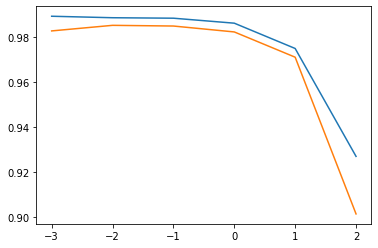

In [65]:
plt.plot(np.log10(alpha_list),train_score,label='train score')
plt.plot(np.log10(alpha_list),test_score,label='test score')
plt.show()

In [66]:
ridge = Ridge(alpha=0.5)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))


0.9877572959822648
0.9839517282827052


In [67]:
train_score=[]
test_score=[]

alpha_list = [0.001, 0.01, 0.1,1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha,max_iter=1000000000)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled,test_target))
print(train_score,test_score)  

[0.9909614939690347, 0.9900512551315644, 0.9887967418757904, 0.9870750412563284, 0.980386314258474, 0.8833367956963488] [0.9602759858216927, 0.9784369186129749, 0.9852037626296842, 0.9831612640549198, 0.9743029821916259, 0.8499063033959214]


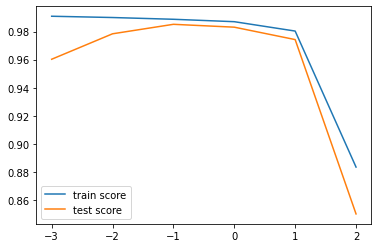

In [68]:
plt.plot(np.log10(alpha_list),train_score,label='train score')
plt.plot(np.log10(alpha_list),test_score,label='test score')
plt.legend()
plt.show()

In [69]:
lasso = Lasso(alpha=1,max_iter=10000000)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))


0.9870750412563284
0.9831612640549198


# 릿지 회귀
마시 말해 w의 모든 원소가 0에 가깝게 되길 원한다.
이런 제약을 규제라고한다.
규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미이다.


# 경사하강법

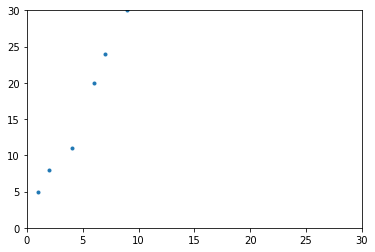

In [70]:
ex = [2,4,7,1,9,6]
ex_ys = [8,11,24,5,30,20]
ex_xs = [[x] for x in ex] # 독립변수 형대로 변환
plt.plot(ex,ex_ys,'.')
# plt.figure(figsize = (4,4))
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

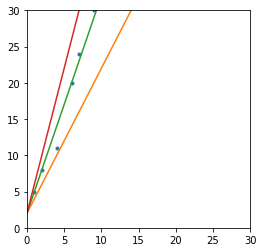

In [71]:
plt.figure(figsize = (4,4))
plt.plot(ex,ex_ys,'.')
plt.plot([0,30],[2*0+2,2*30+2],label='y=2x+2')
plt.plot([0,30],[3*0+2,3*30+2],label='y=3x+2')
plt.plot([0,30],[4*0+2,4*30+2],label='y=4x+2')
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

In [72]:
def mae(yp,y):
  return np.mean(sum(np.abs(yp-y)))
def mse(yp,y):
  return np.mean(sum(yp-y)**2)



In [73]:
yp = np.array([1,2,9])
ya = np.array([2,3,4])
print(mae(yp,ya), mse(yp,ya))

7.0 9.0


In [74]:
ex_arr = np.array(ex)
ey_arr = np.array(ex_ys)
mses=[]

for w in np.arange(-2,5,0.1):
  yp = w*ex_arr+2
  mses.append(mse(yp,ey_arr))
print(mses)
print(np.argmin(mses))
print(mses[50])  


[20736.0, 19909.21, 19099.239999999998, 18306.089999999997, 17529.760000000002, 16770.25, 16027.559999999998, 15301.689999999993, 14592.639999999996, 13900.409999999994, 13224.999999999993, 12566.409999999996, 11924.639999999994, 11299.68999999999, 10691.559999999996, 10100.249999999995, 9525.759999999991, 8968.089999999993, 8427.239999999993, 7903.209999999994, 7395.99999999999, 6905.609999999992, 6432.039999999992, 5975.289999999991, 5535.359999999992, 5112.249999999992, 4705.959999999992, 4316.489999999991, 3943.8399999999906, 3588.0099999999907, 3248.999999999991, 2926.8099999999918, 2621.4399999999914, 2332.889999999992, 2061.159999999992, 1806.2499999999927, 1568.1599999999928, 1346.8899999999928, 1142.4399999999935, 954.8099999999938, 783.9999999999942, 630.0099999999952, 492.8399999999951, 372.48999999999523, 268.9599999999962, 182.24999999999721, 112.35999999999754, 59.28999999999794, 23.039999999998813, 3.6099999999995696, 1.0000000000002611, 15.210000000001125, 46.2400000000

<function matplotlib.pyplot.show>

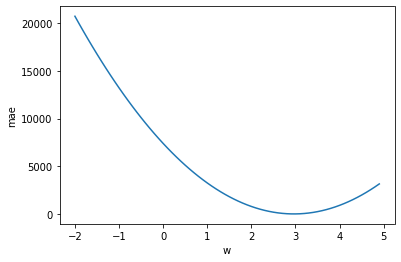

In [75]:
plt.plot(np.arange(-2,5,0.1),mses)
plt.xlabel("w")
plt.ylabel("mae")
plt.show

In [76]:

def gradient(ys,xs,w,b):
  yp = w*xs + b
  error = ys -yp
  wd = -(2/len(xs))*sum(xs*error)
  bd = -(2/len(xs))*sum(error)
  return wd,bd
  # 알파를 러닝 데이트라고 하는데 러닝데이트가 너무 작으면 오래걸리고 너무 많이 가면 원하는 곳을 넘어 가게 된다

In [84]:
def gradient_descent(xs,ys,lr=0.001,epochs=100): # 학습할 횟수 epochs
  wphl = [] # 학습 과정에서의 과중치와 편향을 보관
  wp = np.random.uniform(-1,1) # 초기 가중치를 랜덤하게 설정
  bp = np.random.uniform(-1,1) # 초기 편향을 랜던하게 설정
  for epochs in range(epochs):
    wd,bd = gradient(ys,xs,wp,bp) # 가중치와 편향의 기울기를 계산
    wp = wp -(wd*lr) # 기울기에서 현재 가중치 만큼 뺴준다?
    bp = bp - (bd*lr)
    wphl.append([wp,bp])
  return wp,bp,wphl # 가중치,편향,히스토리 반환



In [ ]:
wp, bp, wphl = gradient_descent(ex_arr,ey_arr)
for epoch , (wb,bd) in enumerate(wphl):
  print("epoch=%04d"%epoch,"w=%10.2f"%wb,"b=%10.2f"% bd)

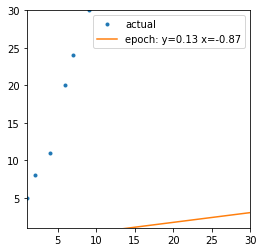

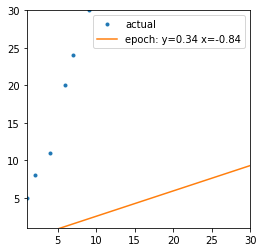

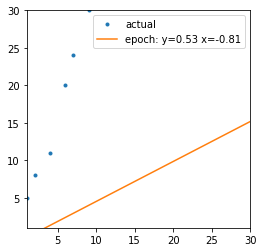

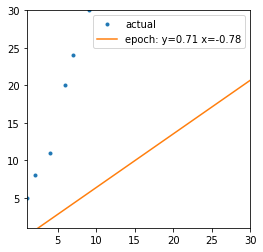

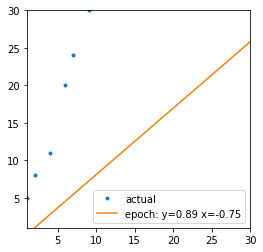

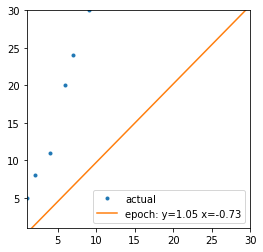

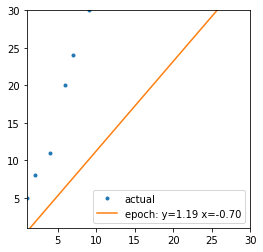

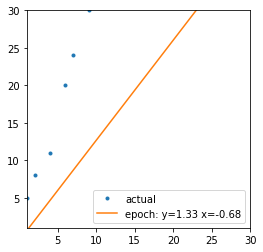

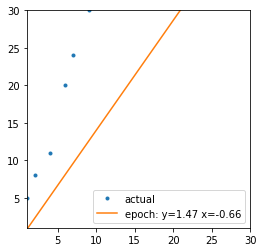

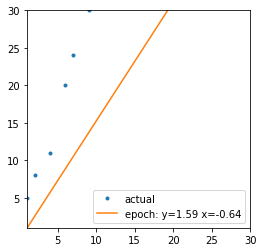

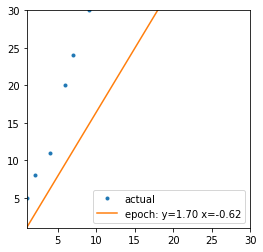

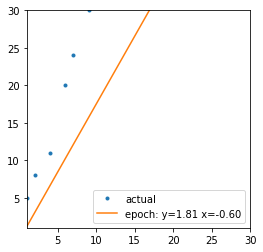

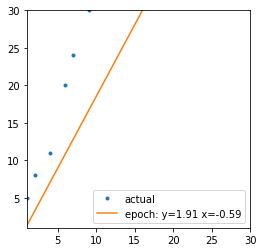

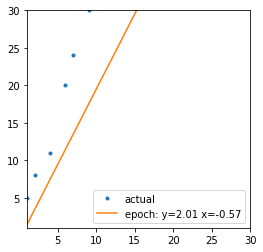

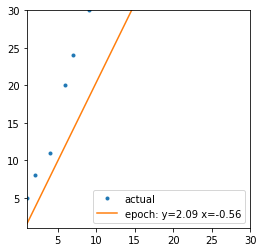

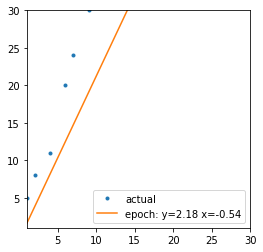

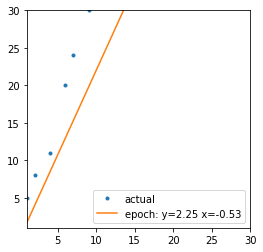

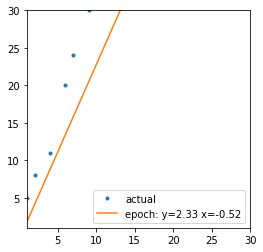

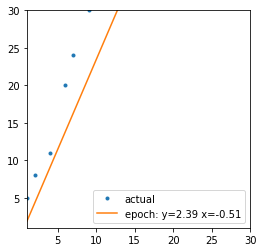

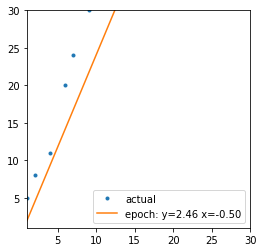

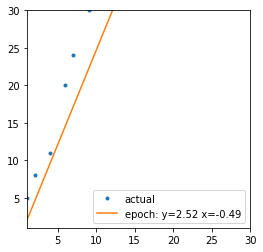

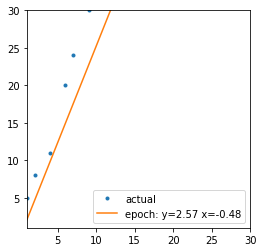

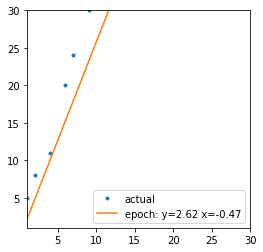

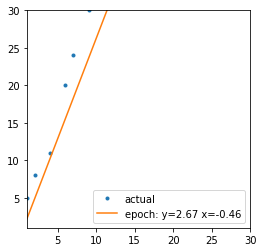

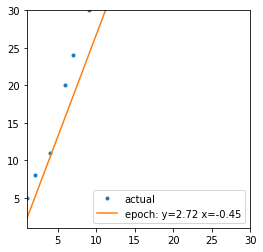

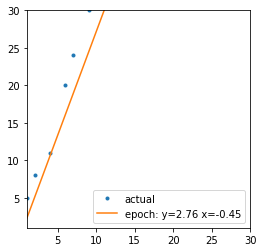

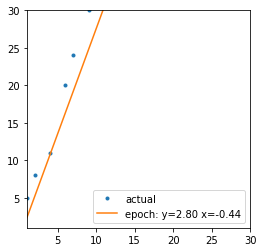

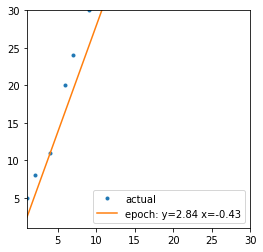

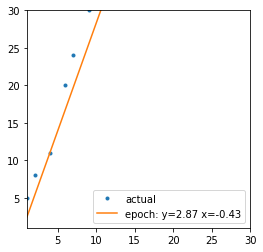

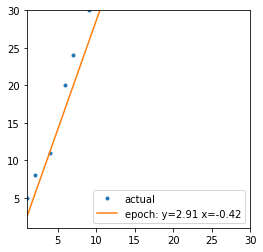

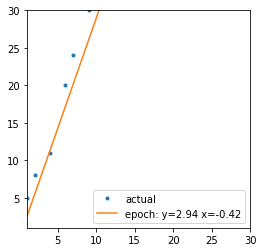

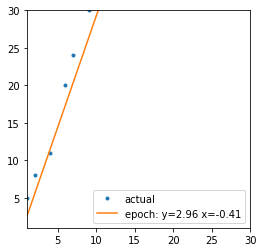

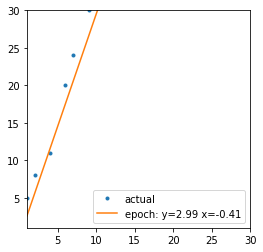

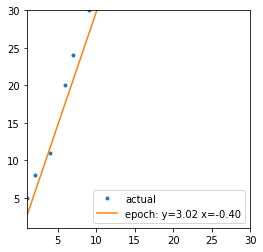

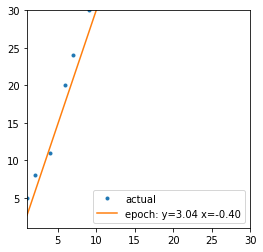

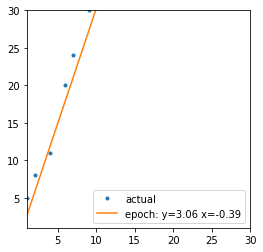

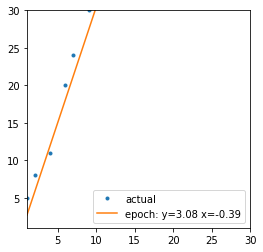

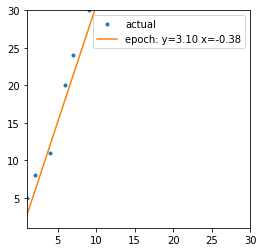

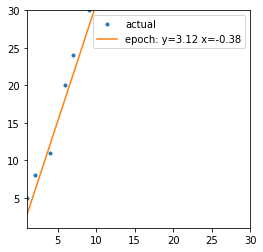

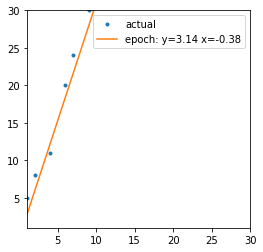

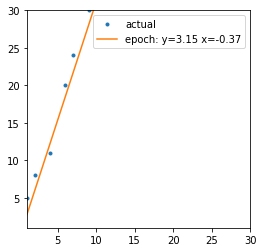

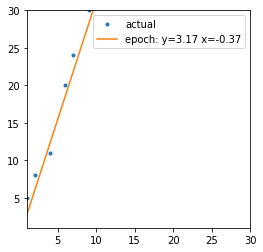

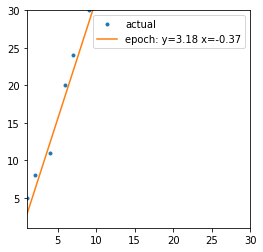

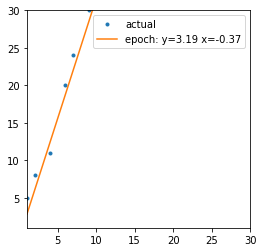

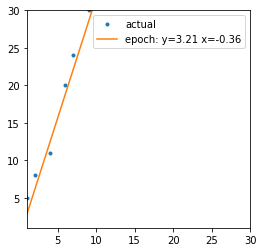

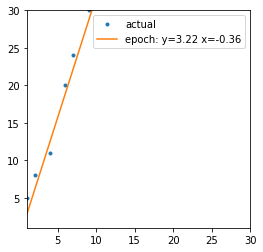

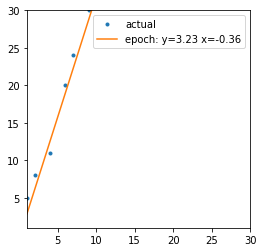

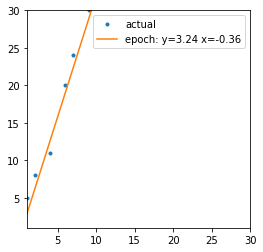

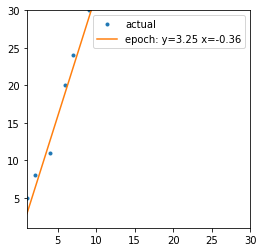

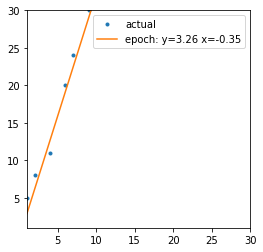

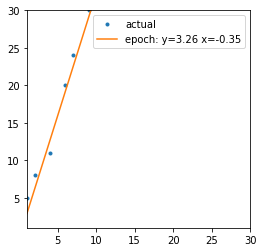

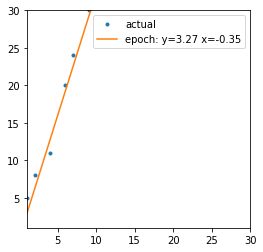

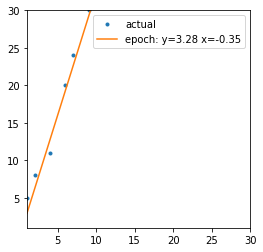

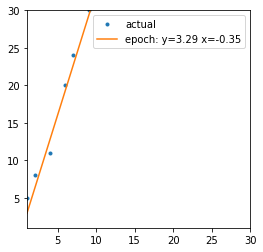

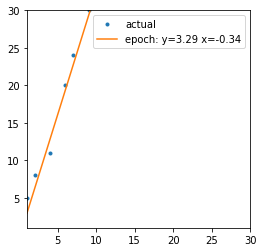

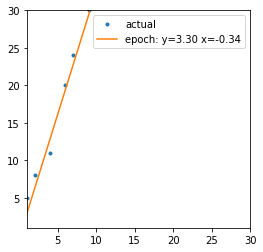

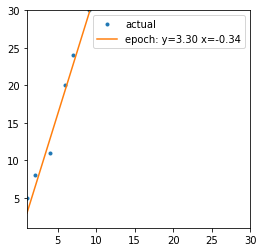

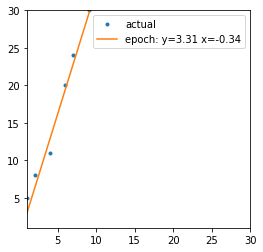

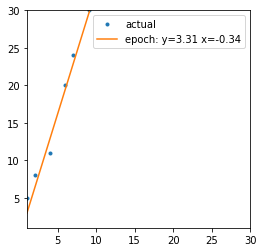

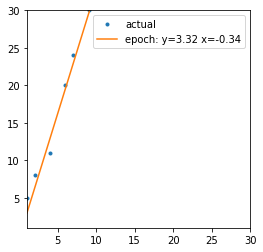

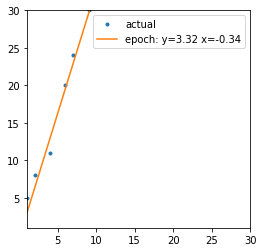

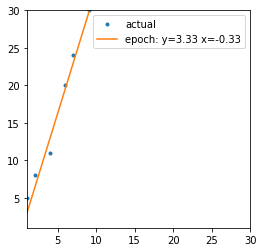

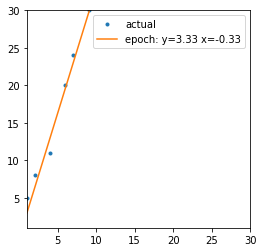

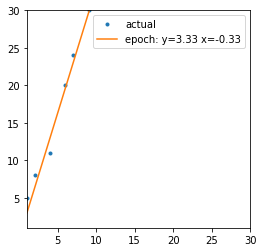

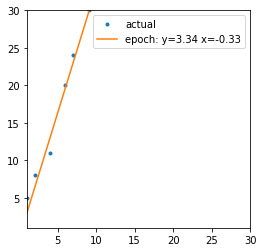

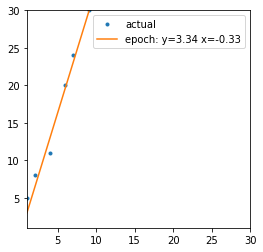

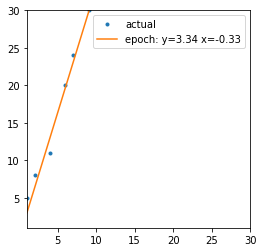

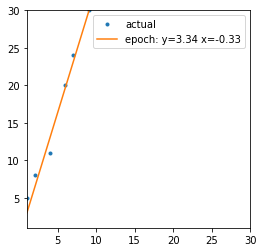

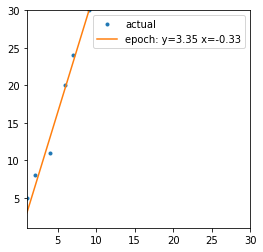

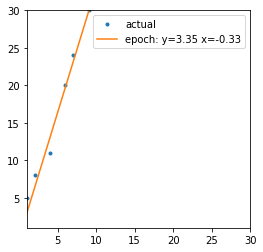

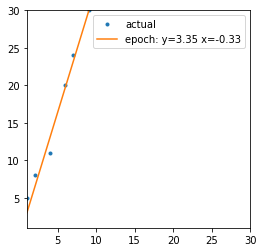

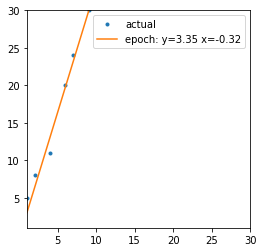

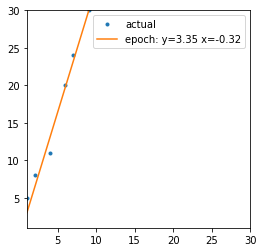

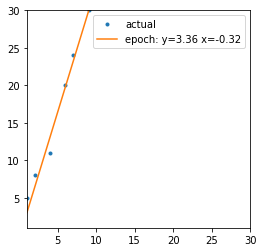

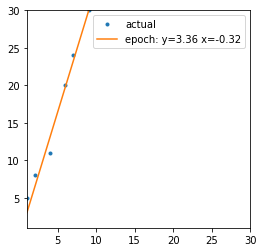

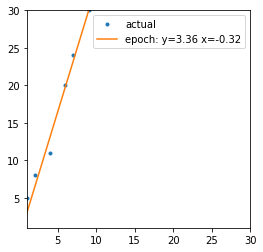

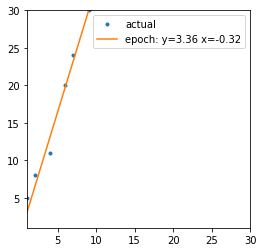

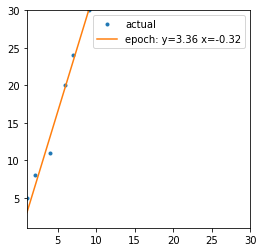

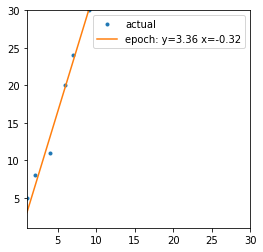

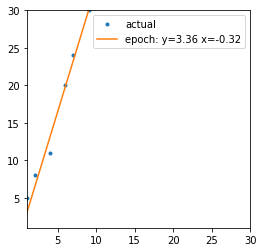

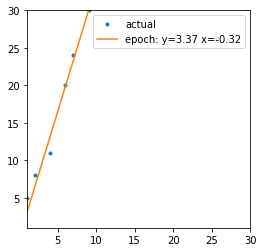

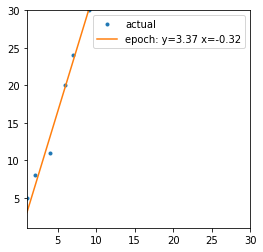

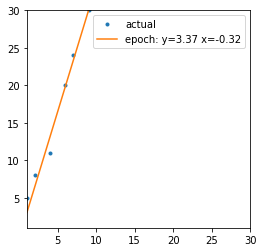

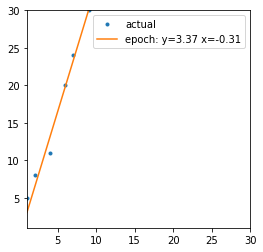

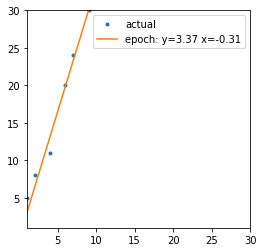

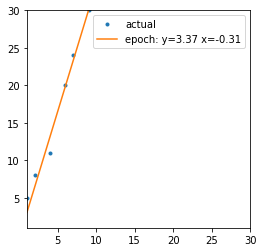

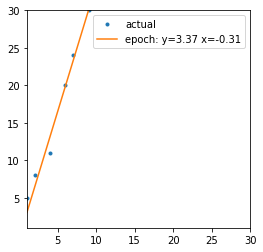

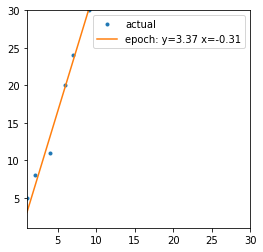

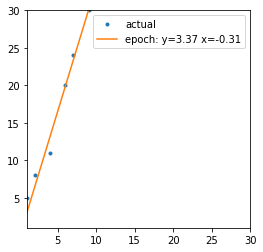

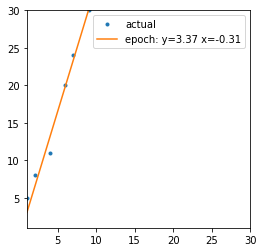

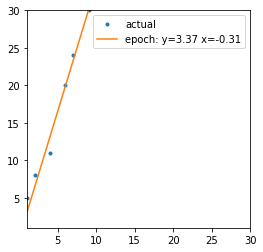

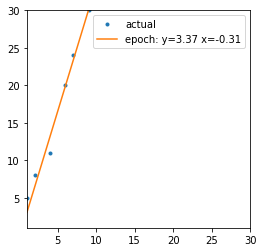

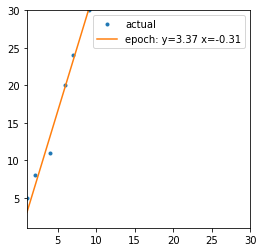

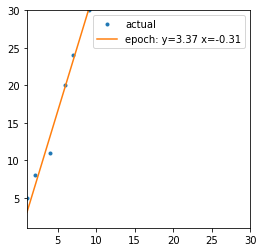

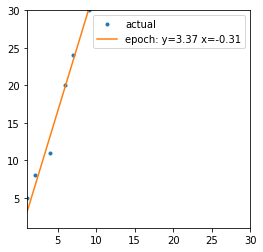

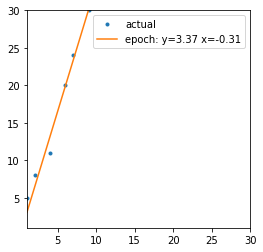

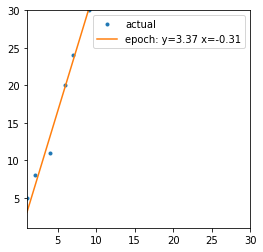

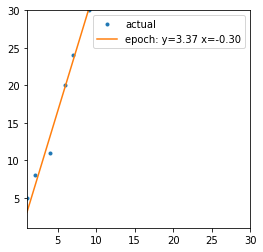

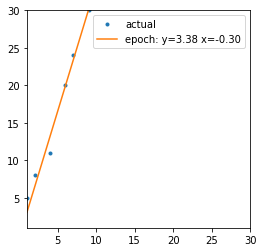

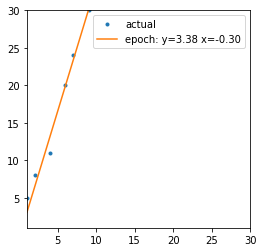

In [86]:
# sx,sy = min(min(ex_arr),min(ey_arr))
from numpy.ma.extras import MAxisConcatenator
min_val = min(min(ex_arr), min(ey_arr))
max_val = max(max(ex_arr), max(ey_arr))
for epoch , (wb,bd) in enumerate(wphl):
  plt.figure(figsize=(4,4))
  sx = min_val
  sy=wb*sx+bd
  ex = max_val
  ey = wb*ex + bd
  plt.plot(ex_arr,ey_arr,'.',label='actual')
  plt.plot([sx,ex],[sy,ey],label='epoch: y=%0.2f x=%0.2f'%(wb,bd))
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()

In [ ]:
from numpy.ma.extras import MAxisConcatenator
min_val = min(min(ex_arr), min(ey_arr))
max_val = max(max(ex_arr), max(ey_arr))
for epoch , (wb,bd) in enumerate(wphl):
  plt.figure(figsize=(4,4))
  sx = min_val
  sy = wb*sx + bd
  ex = max_val
  ey = wb*ex + bd
  plt.plot(ex_arr,ey_arr,'.',label='actual')
  plt.plot([sx,ex],[sy,ey],label=f'epoch:{epoch} y = {wb:.2f}x+{bd:.2f}')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()